# Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.display.max_rows
# pip install funpymodeling
from funpymodeling.exploratory import freq_tbl

In [2]:
df1 = pd.read_csv('../Data/Harry Potter 1.csv', sep = ';', encoding= 'unicode_escape')
df2 = pd.read_csv('../Data/Harry Potter 2.csv', sep = ';', encoding= 'unicode_escape')
df3 = pd.read_csv('../Data/Harry Potter 3.csv', sep = ';', encoding= 'unicode_escape')

# Intervention counting

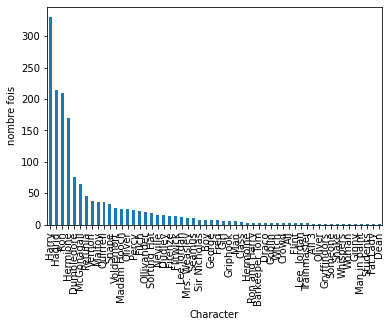

In [3]:
df1.Character = df1.Character.str.strip()
ax = df1.Character.value_counts().plot.bar()
ax.set_ylabel('nombre fois')
ax.set_xlabel('Character')
plt.show()

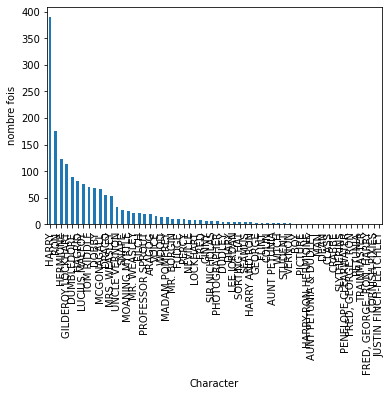

In [4]:
df2.Character = df2.Character.str.strip()
ax = df2.Character.value_counts().plot.bar()
ax.set_ylabel('nombre fois')
ax.set_xlabel('Character')
plt.show()

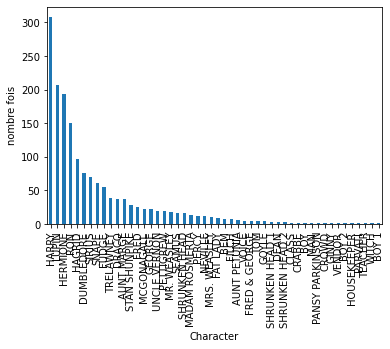

In [5]:
df3.Character = df3.Character.str.strip()
ax = df3.Character.value_counts().plot.bar()
ax.set_ylabel('nombre fois')
ax.set_xlabel('Character')
plt.show()

# Gender counting

In [6]:
df_char = pd.read_csv('../Data/Characters.csv', sep = r'\;')
df_char.isnull().sum()
df_char[["Job", "Blood status", "Species"]] = df_char[["Job", "Blood status", "Species"]].replace(["\xa0", "\x96", "\n", "\["], " ", regex=True)
df1 = df_char.apply(lambda x: x.str.strip() if x.dtypes == "O" else x) # removing white spaces
df1["Blood status"].unique()
df1["Blood status"] = df1["Blood status"].str.title()# Pure-blood or half-blood = Pure-blood or Half-blood
df1["Blood status"].unique()# there are two spellings for this one, so I decided to title case them
# overall gender percentage
size = df1.groupby("Gender").size()
labels = size.index

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


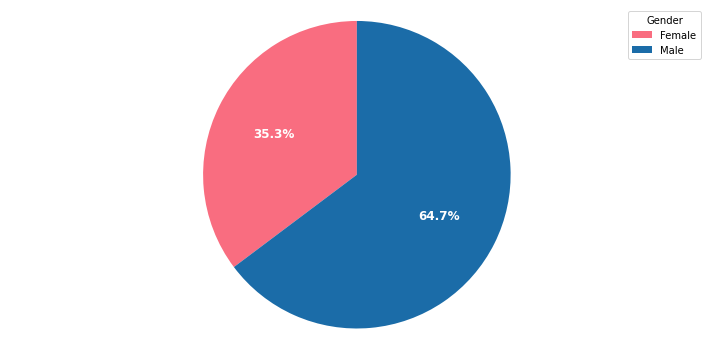

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
patches, texts, autotexts = ax.pie(size, colors=["#f96d80", "#1b6ca8"], autopct='%1.1f%%', startangle=90)

for auto in autotexts:
    auto.set_color("white")

ax.legend(patches, labels, title="Gender", loc="best")
plt.setp(autotexts, size=12, weight="bold")
ax.axis('equal')
plt.tight_layout()
plt.show()

# gender based on houses

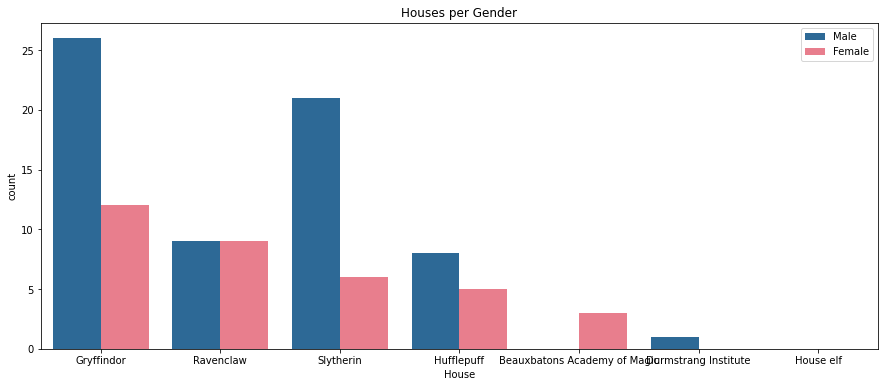

In [10]:
plt.figure(figsize=(15, 6))
a = sns.countplot(x="House", hue="Gender", palette=["#1b6ca8", "#f96d80"], data=df_char)
a.legend(loc="upper right")
plt.title("Houses per Gender")
plt.xlabel("House")
plt.show()

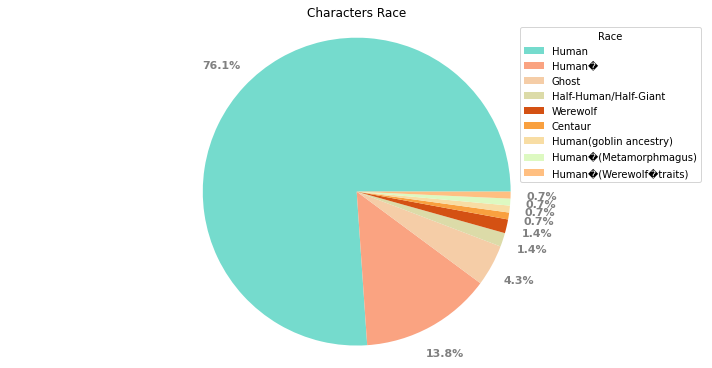

In [13]:
#Race :  Well as expected there are more Humans
race = df1.groupby("Species").size().sort_values(ascending=False)
labels = race.index
color = ["#75DBCD", "#FAA381", "#F5CDA7", "#DCDBA8", "#D45113", "#F9A03F", "#F8DDA4", "#DDF9C1", "#FFBF81"]
fig, ax = plt.subplots(figsize=(10, 5))
patches, texts, autotexts = ax.pie(race, colors=color, pctdistance=1.2, labeldistance=1.2, autopct='%1.1f%%')

for auto in autotexts:
    auto.set_color("grey")

ax.legend(labels=labels, title="Race", loc="best")
plt.setp(autotexts, size=11, weight="bold")
ax.axis('equal')
plt.tight_layout()
plt.title("Characters Race")
plt.show()

# Blood status

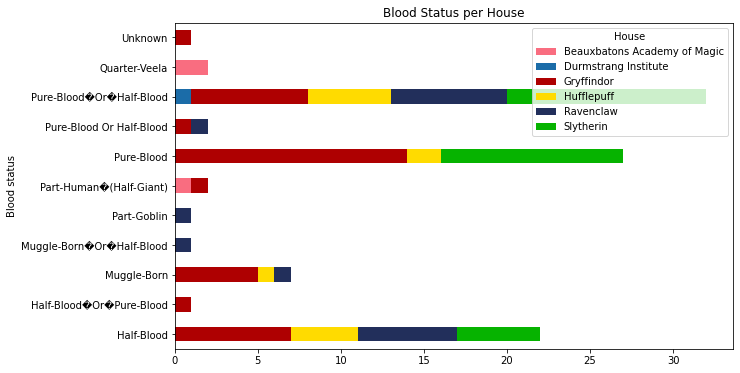

In [15]:
pd.crosstab(df1["Blood status"], df1["House"]).plot(stacked=True, figsize=(10, 6), kind = 'barh', color= ["#f96d80", "#1b6ca8", "#AE0001", "#FFDB00", "#222F5B", "#06b300"])
plt.title("Blood Status per House")
plt.show()